# DAT158 Machine Learning Oblig 2 - Predicting house prices
Gruppe 22: Oneal Didrik Ferkingstad Lane og Jaran Jonasson

## Frame the problem and look at the big picture

The purpose of this assignment is to train a machine learning model and deploy the model. The model that is being developed is trained to predict the saleprice of houses based on a number of features. 

Type of problem:
- Supervised learning since input data contains labels (target values), which in this case is the house's sale price (SalePrice)
- Regression because the model is predicting av value (sale price for a house). 
- Batch learning since the model is trained on the batch of available data at the time of builiding the model. 
  
Performance measure:
  - RMSLE (Root Mean Squared Log Error) which is based on measuring the RMSE between the logarithm of the predicted values and the logarithm of the actual sale prices. 
   



### Setup

In [1]:
# For å vise plots direkte i notebook
%matplotlib inline

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #used?
import seaborn as sns           #used?
import sklearn
from pycaret.regression import *

# To make the notebook reproducible, we set the random seed
np.random.seed(42)
sessionId = 123

# To automatically reload modules defined in external files.
%reload_ext autoreload
%autoreload 2


## Get the data

In [545]:
# Reads in the csv-files and creates a dataframe using pandas

# retrieving data for training the model
train = pd.read_csv('data/house-prices/train.csv') 

# retrieving data for testing the model
test = pd.read_csv('data/house-prices/test.csv')

sample = pd.read_csv('data/house-prices/sample_submission.csv')


In [601]:
ok = test[:1][['OverallQual','OverallCond', 'GrLivArea', 'TotalBsmtSF', 'BsmtQual','BsmtCond', 'BsmtExposure', 
                          'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 
                          'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath',
                         'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
                         'GarageArea', 'GarageQual', 'GarageCond',
                         'KitchenAbvGr', 'KitchenQual', '1stFlrSF', '2ndFlrSF',
                         'LotArea', 'LotFrontage', 'YearBuilt', 'YearRemodAdd',
                          'OpenPorchSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','BedroomAbvGr', 'Neighborhood',
               'Exterior1st','Exterior2nd','ExterQual', 'ExterCond']]
ok.values


array([[5, 6, 896, 882.0, 'TA', 'TA', 'No', 'Rec', 468.0, 'LwQ', 144.0,
        270.0, 0.0, 0.0, 'Attchd', 1961.0, 'Unf', 1.0, 730.0, 'TA', 'TA',
        1, 'TA', 896, 0, 11622, 80.0, 1961, 1961, 0, 1, 0, 5, 2, 'NAmes',
        'VinylSd', 'VinylSd', 'TA', 'TA']], dtype=object)

In [602]:
ok = train[:1][['OverallQual','OverallCond', 'GrLivArea', 'TotalBsmtSF', 'BsmtQual','BsmtCond', 'BsmtExposure', 
                          'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 
                          'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath',
                         'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
                         'GarageArea', 'GarageQual', 'GarageCond',
                         'KitchenAbvGr', 'KitchenQual', '1stFlrSF', '2ndFlrSF',
                         'LotArea', 'LotFrontage', 'YearBuilt', 'YearRemodAdd',
                          'OpenPorchSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','BedroomAbvGr', 'Neighborhood',
               'Exterior1st','Exterior2nd','ExterQual', 'ExterCond']]
ok.values

array([[7, 5, 1710, 856, 'Gd', 'TA', 'No', 'GLQ', 706, 'Unf', 0, 150, 1,
        0, 'Attchd', 2003.0, 'RFn', 2, 548, 'TA', 'TA', 1, 'Gd', 856,
        854, 8450, 65.0, 2003, 2003, 61, 2, 1, 8, 3, 'CollgCr',
        'VinylSd', 'VinylSd', 'Gd', 'TA']], dtype=object)

In [6]:
train[:1]['SalePrice']

0    208500
Name: SalePrice, dtype: int64

In [7]:
train.shape

(1460, 81)

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.shape

(1459, 80)

In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
num_features = train.select_dtypes(include=np.number).columns
len(num_features) # 37 Numeric features (excluding Id)


38

In [14]:
cat_features = train.select_dtypes(include='object').columns
len(cat_features) # 43 Categorial features

43

In [15]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
train.isnull().sum().sort_values(ascending=False)[:19]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [18]:
highMV_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

Some useful notes from studying the information from the train and test data:
- The data instances have a lot of features (37 numeric and 43 non-numeric)
- Some features contain a lot of missing values (Alley, FireplaceQu, PoolQC, Fence, MiscFeature)
- A lot of the numeric values also have a high value count for 0.
- 75% of the houses had a saleprice of 214 000 dollars or below, while the most expensive saleprice is 755 000 dollars

More in depth descriptions of each feature is given at: https://www.kaggle.com/skirmer/fun-with-real-estate-data/data

## Exploring the data

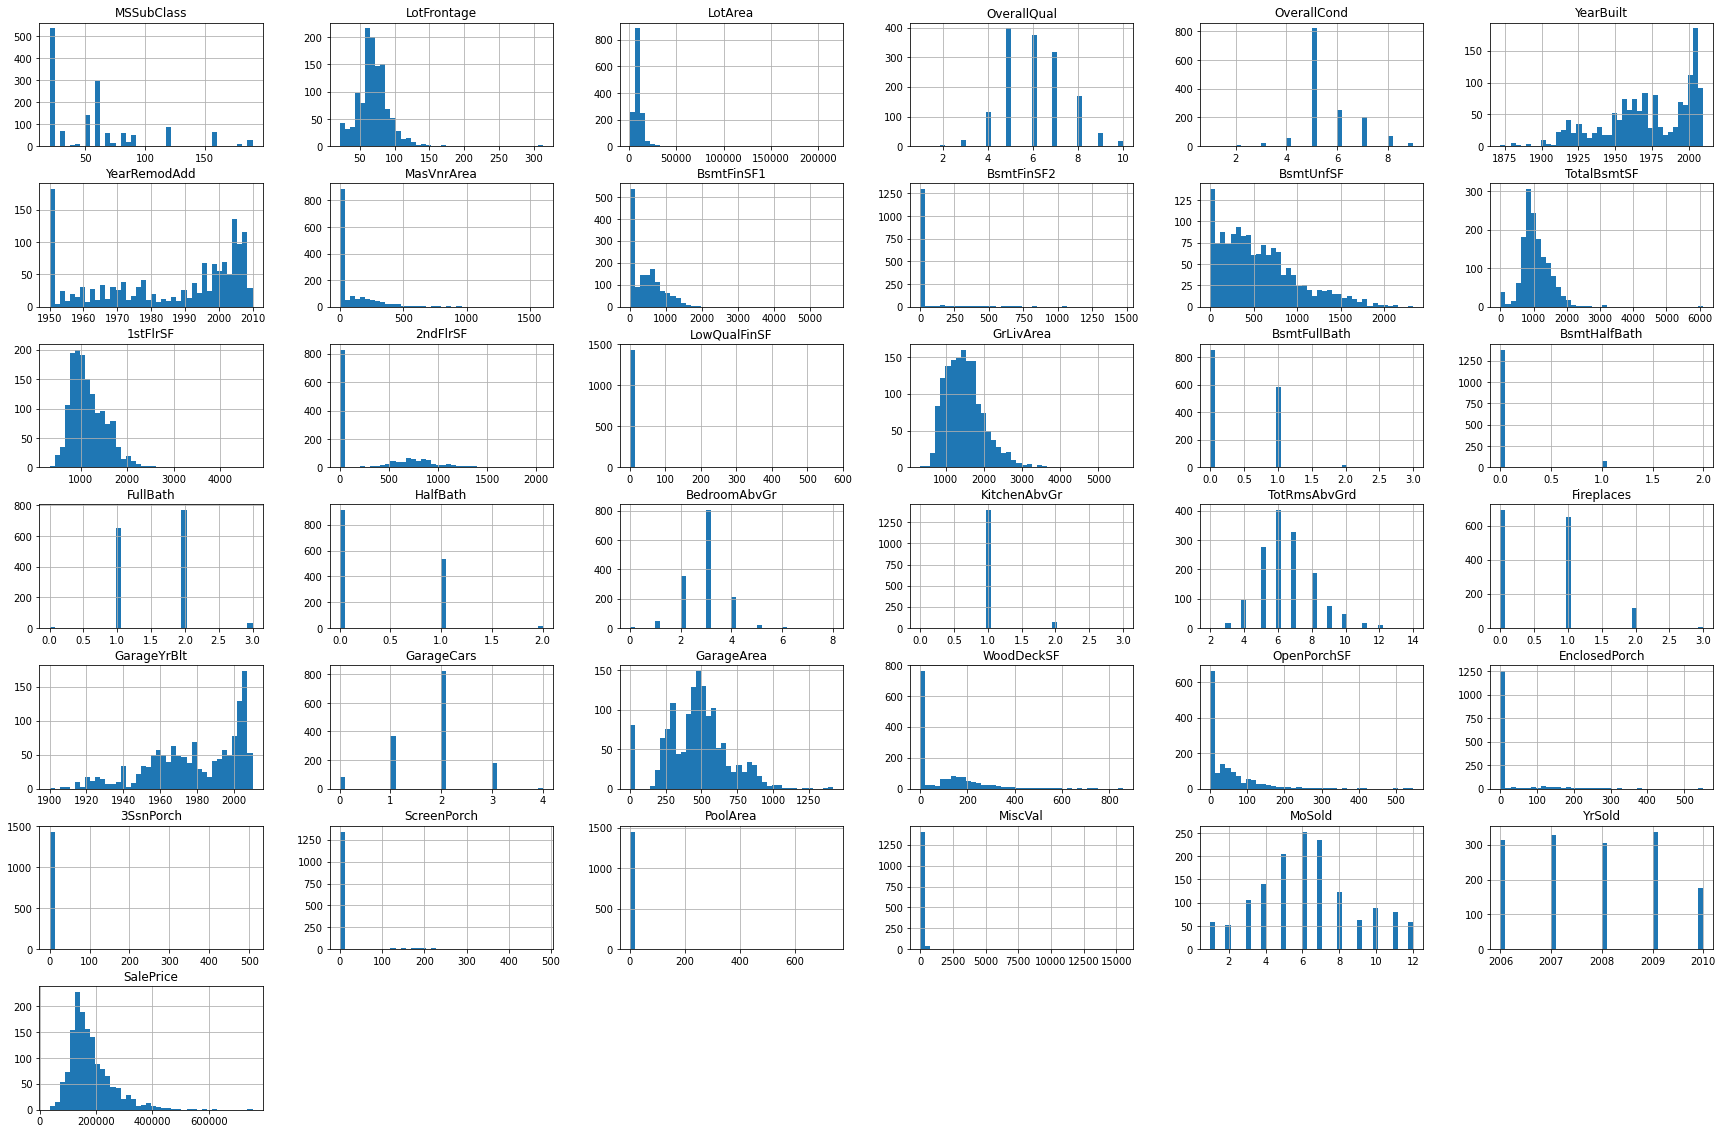

In [20]:
trainC = train.copy()
trainC = trainC.drop("Id", axis=1)
trainC.hist(bins=40, figsize=(30,20)) 
plt.show()

**Notes:**
* A lot of the features are categorical (not continous)
* Many histograms are tail heavy, for instances the SalePrice, 1stFlrSF, GrLivArea, TotalBsmtSF, LotFrontage and GarageArea. The distribution of these features however, are somewhat similar, and could indicate correlation. For instances that bigger houses and house lots may result in a higher SalePrice, which makes sense in a lot of cases. 
* A lot of features have a high value count for 0, indicating that they are not relevant for a lot of houses in the training data. We may consider removing or transforming some of these features.  

### Correlation between attributes

In [21]:
corr_matrix = trainC.corr() 
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', yla

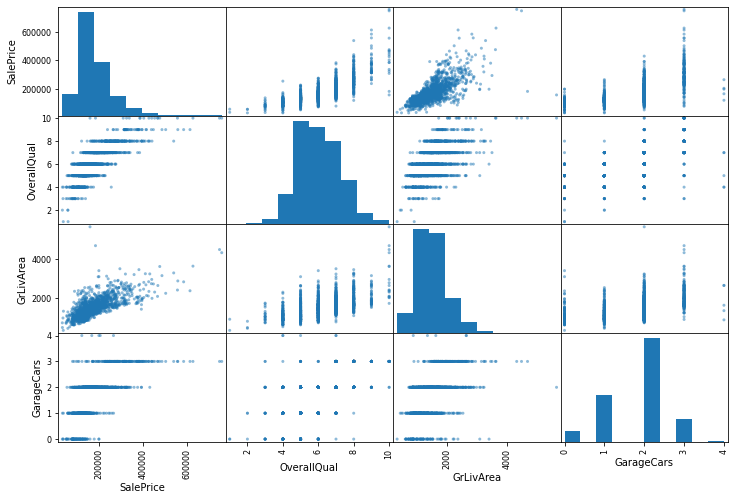

In [22]:
from pandas.plotting import scatter_matrix
# Plotting the correlation between the each pair of features listed in scatter_attributes
scatter_attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]
scatter_matrix(train[scatter_attributes], figsize=(12, 8))

- The correlation plots show us that the GarageCars (car capacity of a garage) and OverallQual features are not continuous values. 
- The GrLivArea (Above grade (ground) living area square feet) feature seems like a promising indicator for predicting sale price. 

## Data preparation

In this assignment PyCaret's setup method is used to preprocess the data. This is a method that does a lot of useful data preparation like data cleaning, imputation, feature engineering and feature selection.

### Explaination of some data preprocessing in the setup method
**Handling missing values:**
- Numeric imputation is by default the mean value, but can be changed by changing the numeric_imputation parameter.
- Categorial imputation is by default a constant 'not_available', but can be changed by changing the categorial_imputation parameter. 

**Scaling:**
- Normalization is applied when setting the parameter: normalize=True (default False) 
- It is also possible to change the shape of the distribution of the features, by specifying the parameter: transformation=True, This will transform the data so it can be represented by a normal or approximate normal distribution. 

**Setting datatypes:**
- PyCaret automatically detects datatype, but can sometimes be wrong. Therefore it is possible to explicitly tell what features are numeric, categorial and date.
- numeric_features=['feature1', 'feature2', ...]
- categorial_features=['feature1', 'feature2', ...]
- It is also possible to specify features to ignore: ignore_features=['feature1', 'feature2', ...]

**Converting categorial values:**
- One Hot Encoding is used as default
- Ordinal Encoding can be used for encoding categorial values that have a natural order. This can be specified in the setup method by setting the ordinal_features
- Cardinal Encoding can be a useful alternative to One Hot Encoding, if the category has a lot of possible values (high cardinality) 

**Handling unknown levels:**
- The unseen data the model is making predictions on, may contain new levels (values) for categorial features, that were not present when training the model. 
- The handle_unknown_categorical parameter is by default True and replaces new levels in unseen data, by the most or least (default) frequent level in the training data. The replacement method can be specified with the unknown_categorical_method parameter.

**Feature selection:**
- Can choose to have feature selection by setting the parameter: feature_selection=True, and a threshold: feature_selection_threshold=threshold (default = 0.8)
- Can choose to remove features with low variance by specifiying: ignore_low_variance=True. This will ignore features that satisfy the following conditions:
    * Count of unique values in a feature  / sample size < 10%
    * Count of most common value / Count of second most common value > 20 times.

**Feature interaction (combining attributes)**
- Sometimes combinations of two features can be more helpful for predicting, than the two feature separately
- By specifying the parameter: featue_interaction = True, the setup method will create new features by interacting (a * b) for all numeric variables in the dataset
- By specifying the parameter: featue_ratio = True, the setup method will create new features by calculating the ratios (a / b) for all numeric variables in the dataset
- The parameter: interaction_threshold (default = 0.01) can be used to only keep features whoose feature importance falls within the percentile of the threshold

Note: Using the feature interaction parameters when dealing with a lot of numeric features may not be scalable. In our case we have a lot of numeric features, meaning a lot of possible combinations of new features. 


### Setting dataypes

In [23]:
numeric_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
        'MiscVal', 'MoSold', 'YrSold']
        #Excluding ID and SalePrice

In [24]:
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

### Converting categorial features to numeric values

In this dataset we have a lot of categorial values and have to consider which encoder we want to use on each feature. Based on the data descriptions the categories can be divided into: 

In [25]:
one_hot_cat = ['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation','Heating', 'Electrical',
       'GarageType', 'MiscFeature','SaleType', 'SaleCondition']

In [26]:
ordinal_cat = { 'Street' : ['not_available', 'Grvl', 'Pave'],
                'Alley' : ['not_available', 'Grvl', 'Pave'],
                'LotShape' : ['not_available', 'IR3', 'IR2', 'IR1', 'Reg'],
                'LandContour' : ['not_available', 'Low', 'HLS', 'Bnk', 'Lvl'],
                'Utilities' : ['not_available', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
                'LandSlope' : ['not_available', 'Gtl', 'Mod', 'Sev'],
                'ExterQual' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'ExterCond' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'BsmtQual' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'BsmtCond' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'BsmtExposure' : ['not_available', 'No', 'Mn', 'Av', 'Gd'],
                'BsmtFinType1' : ['not_available', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                'BsmtFinType2' : ['not_available', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                'HeatingQC' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'CentralAir' : ['not_available', 'N', 'Y'],
                'KitchenQual' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'Functional' : ['not_available', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                'FireplaceQu' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'GarageFinish' : ['not_available', 'Unf', 'RFn', 'Fin'],
                'GarageQual' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'GarageCond' : ['not_available', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'PavedDrive' : ['not_available', 'N', 'P', 'Y'],
                'PoolQC' : ['not_available', 'Fa', 'TA', 'Gd', 'Ex'],
                'Fence' : ['not_available', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
               }

# Ny ordinal_features with all possible values
ordinal_cat_psb = { 'Street' : ['Grvl', 'Pave'],
                'Alley' : ['Grvl', 'Pave'],
                'LotShape' : ['IR3', 'IR2', 'IR1', 'Reg'],
                'LandContour' : ['Low', 'HLS', 'Bnk', 'Lvl'],
                'LandSlope' : ['Gtl', 'Mod', 'Sev'],
                'ExterQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'BsmtQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                'BsmtCond' : ['Po', 'Fa', 'TA', 'Gd'],
                'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
                'BsmtFinType1' : ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                'BsmtFinType2' : ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'CentralAir' : ['N', 'Y'],
                'KitchenQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                'Functional' : ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                'FireplaceQu' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'GarageFinish' : ['Unf', 'RFn', 'Fin'],
                'GarageQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'GarageCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                'PavedDrive' : ['N', 'P', 'Y'],
                'PoolQC' : ['Fa', 'Gd', 'Ex'],
                'Fence' : ['MnWw', 'GdWo', 'MnPrv', 'GdPrv']
               }

In [27]:
cardinal_cat = 1 #maybe neigborhood

### Feature selection

Some features may be excluded when traning. This can be features that for example contain a lot of missing values, or doesn't give a lot of information gain when predicting out target value. 

#### Low variance

In [28]:
train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [29]:
train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [30]:
train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [31]:
train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [32]:
train.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

The value counts shows little variation in the training data for the features: Utilities, Functional, CentralAir and PavedDrive. 

In [134]:
lowVarianceCat = ['Utilities', 'Functional', 'CentralAir', 'PavedDrive']


In [84]:
train_num = trainC[numeric_features]
zeroPercentages = []

print("Feature")
for f in train_num:
    zeros = len(train_num[(train_num[f] == 0)])
    zeroPercentage = round((zeros/(len(train_num))*100), 2)
    zeroPercentages.append({f :zeroPercentage})
    print('{}: {}% have value 0'.format(f, zeroPercentage))

Feature
MSSubClass: 0.0% have value 0
LotFrontage: 0.0% have value 0
LotArea: 0.0% have value 0
OverallQual: 0.0% have value 0
OverallCond: 0.0% have value 0
YearBuilt: 0.0% have value 0
YearRemodAdd: 0.0% have value 0
MasVnrArea: 58.97% have value 0
BsmtFinSF1: 31.99% have value 0
BsmtFinSF2: 88.56% have value 0
BsmtUnfSF: 8.08% have value 0
TotalBsmtSF: 2.53% have value 0
1stFlrSF: 0.0% have value 0
2ndFlrSF: 56.78% have value 0
LowQualFinSF: 98.22% have value 0
GrLivArea: 0.0% have value 0
BsmtFullBath: 58.63% have value 0
BsmtHalfBath: 94.38% have value 0
FullBath: 0.62% have value 0
HalfBath: 62.53% have value 0
BedroomAbvGr: 0.41% have value 0
KitchenAbvGr: 0.07% have value 0
TotRmsAbvGrd: 0.0% have value 0
Fireplaces: 47.26% have value 0
GarageYrBlt: 0.0% have value 0
GarageCars: 5.55% have value 0
GarageArea: 5.55% have value 0
WoodDeckSF: 52.12% have value 0
OpenPorchSF: 44.93% have value 0
EnclosedPorch: 85.75% have value 0
3SsnPorch: 98.36% have value 0
ScreenPorch: 92.05% h

In [99]:
def getAboveZeroThreshold(data_num, threshold):
    """ Method that returns features with a percentage of zero values above threshold given as input"""
    
    aboveThreshold = []
    
    for f in data_num:
        zeros = len(data_num[(data_num[f] == 0)])
        zeroPercentage = round((zeros/(len(data_num))*100), 2)
     
        if(zeroPercentage > threshold):
            aboveThreshold.append(f)
            
    return aboveThreshold
    

In [171]:
above80zero = getAboveZeroThreshold(train_num, 80)
above80zero

['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [510]:
above90zero = getAboveZeroThreshold(train_num, 90)
above90zero

['LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [511]:
above95zero = getAboveZeroThreshold(train_num, 95)
above95zero

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']

In [342]:
highMV_features

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [476]:
ignore = lowVarianceCat + above95zero + highMV_features[:3]

In [477]:
ignore

['Utilities',
 'Functional',
 'CentralAir',
 'PavedDrive',
 'LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'PoolQC',
 'MiscFeature',
 'Alley']

### Pycaret setup

In [570]:
# data = setup(data=train, target ='SalePrice', train_size=0.8, fold_shuffle=True, fold = 10, normalize=True, 
# session_id=sessionId)

# data = setup(data=train, target ='SalePrice', train_size=0.8, fold_shuffle=True, fold = 10, normalize=True, 
#          session_id=sessionId, numeric_features=numeric_features, categorical_features=categorical_features)

# data = setup(data=train, target ='SalePrice', train_size=0.8, fold_shuffle=True, fold = 10, normalize=True, 
#             session_id=sessionId, numeric_features=numeric_features, categorical_features=categorical_features,
#            ordinal_features=ordinal_cat_psb)
        
#data = setup(data=train, target ='SalePrice', train_size=0.8, fold_shuffle=True, fold = 10, normalize=True, 
#          session_id=sessionId, numeric_features=numeric_features, categorical_features=categorical_features,
#          ignore_features=ignore)

#data = setup(data=train, target ='SalePrice', train_size=0.8, fold_shuffle=True, fold = 10, normalize=True, 
#            session_id=sessionId, numeric_features=numeric_features, categorical_features=categorical_features,
#             ignore_low_variance=True, ignore_features=ignore)

#data = setup(data=train, target ='SalePrice', train_size=0.8, fold_shuffle=True, fold = 10, normalize=True, 
#          session_id=sessionId, numeric_features=numeric_features, categorical_features=categorical_features,
#          ignore_features=ignore, feature_selection=True, feature_selection_threshold=0.8 )

data = setup(data=train, target ='SalePrice', train_size=0.8, fold_shuffle=True, fold = 10, normalize=True, 
          session_id=sessionId, numeric_features=numeric_features, categorical_features=categorical_features,
          ignore_features=ignore, numeric_imputation="median")

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,33
5,Categorical Features,36
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1168, 263)"


## Machine learning models

In [571]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


The compare_models function from PyCaret trains all the models using default hyperparameters, and gives an evalutation of the models' performance based on different metrics. In this assignment RMSE is the metric used for measuring performance. And we choose the four best performing models (n_select=4).

turbo=False means that the method doesn't skip certain models with longer run-time. 

In [572]:
best_models = compare_models(n_select=4, sort='RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16744.8446,822098871.4650,27933.5986,0.8629,0.1376,0.0979,0.2490
lightgbm,Light Gradient Boosting Machine,17355.4422,938540805.2666,30228.6960,0.8409,0.1408,0.0996,0.1070
par,Passive Aggressive Regressor,16692.8138,1087265277.8911,30993.6792,0.7982,0.1450,0.0990,0.2720
huber,Huber Regressor,16515.0196,1059738945.5662,30435.5099,0.8001,0.1472,0.0988,0.3260
rf,Random Forest Regressor,18265.2911,964329249.2448,30622.5567,0.8371,0.1515,0.1087,0.5690
en,Elastic Net,19830.5403,1344271094.0318,35532.5809,0.7652,0.1521,0.1113,0.0410
et,Extra Trees Regressor,18519.3744,1079279699.1975,32135.6186,0.8216,0.1523,0.1093,0.6050
br,Bayesian Ridge,18600.1187,1231939125.3917,33392.7952,0.7717,0.1617,0.1110,0.1010
knn,K Neighbors Regressor,21432.3896,1406611502.2219,36817.3059,0.7628,0.1679,0.1198,0.0820
ridge,Ridge Regression,19252.9472,1295516046.9297,34195.4182,0.7543,0.1740,0.1151,0.0280


In [573]:
best_models

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               ran

## Hyperparameter tuning

In PyCaret hyperparameter tuning is easily done by using the tune_model method. It uses a randomized grid search and the amount of iterations can be specified in the n_iter parameter. 

In [574]:
tuned_best_models = [tune_model(i, optimize='RMSLE', n_iter=5) for i in best_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15668.9533,485074322.6322,22024.4029,0.8853,0.1168,0.0900
1,19120.2940,3021429872.8401,54967.5347,0.2460,0.1982,0.1270
2,17479.0617,827756975.0366,28770.7660,0.8601,0.1475,0.1031
3,19872.8421,1197395214.7374,34603.3989,0.8351,0.1310,0.0942
4,16696.9112,535286576.2404,23136.2611,0.8846,0.1288,0.0994
5,18089.0746,869576961.5366,29488.5904,0.8807,0.1520,0.1030
6,19513.7755,1087656263.4398,32979.6341,0.8648,0.1256,0.0912
7,19480.8178,1648718116.8380,40604.4101,0.7167,0.1540,0.1050
8,17850.6397,1358937776.2437,36863.7732,0.8232,0.1271,0.0886
9,21372.5290,1500531523.4819,38736.6948,0.8141,0.1583,0.1199


In [575]:
tuned_best_models

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.4, loss='ls', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               

### Model Ensembling using blender

Før eg får tid til å kjøre lengre hyperparametertuning, blendes modellene med default hyperparametre

In [576]:
tuned_blender = blend_models(estimator_list = tuned_best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13454.5530,345264118.0180,18581.2841,0.9183,0.1016,0.0790
1,18341.8011,1973359129.0684,44422.5070,0.5076,0.1825,0.1184
2,15536.4615,559557544.8190,23654.9687,0.9054,0.1427,0.0990
3,16550.2440,778009018.5341,27892.8130,0.8928,0.1183,0.0847
4,15736.7769,562853444.5034,23724.5325,0.8787,0.1238,0.0921
5,16233.3629,725324287.4854,26931.8452,0.9005,0.1397,0.0949
6,15852.9617,607653944.7881,24650.6378,0.9245,0.1076,0.0795
7,15629.6192,1374697395.4563,37076.9119,0.7638,0.1366,0.0846
8,15188.8263,901785515.2950,30029.7438,0.8827,0.1156,0.0804
9,16945.0050,1154284979.8169,33974.7698,0.8570,0.1302,0.0942


In [577]:
blender = blend_models(estimator_list = best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13965.9172,376485883.8172,19403.2442,0.9109,0.1038,0.0799
1,16406.3920,1798178586.2220,42404.9359,0.5513,0.1808,0.1113
2,15695.5553,537672074.3040,23187.7570,0.9091,0.1460,0.1019
3,15254.6324,680188098.6624,26080.4160,0.9063,0.1120,0.0806
4,14566.9431,415890850.3351,20393.4021,0.9104,0.1191,0.0883
5,14956.0533,629042234.9236,25080.7144,0.9137,0.1320,0.0868
6,14882.0395,514350364.4172,22679.2937,0.9361,0.1062,0.0783
7,15574.6383,1770099843.1057,42072.5545,0.6959,0.1451,0.0877
8,14796.2919,834119614.2972,28881.1290,0.8915,0.1221,0.0802
9,14752.4043,794788980.6617,28192.0021,0.9015,0.1195,0.0836


### Analyze the model

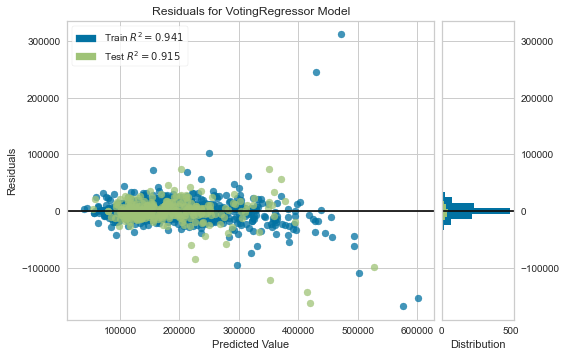

In [578]:
plot_model(blender)

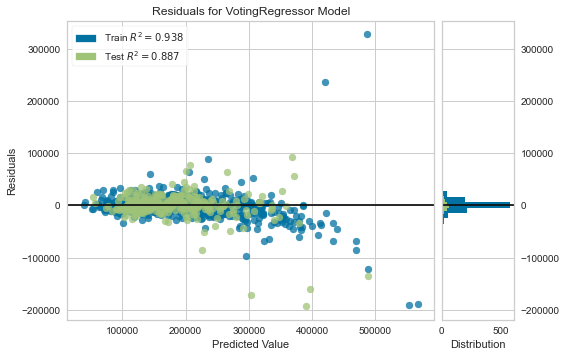

In [579]:
plot_model(tuned_blender)

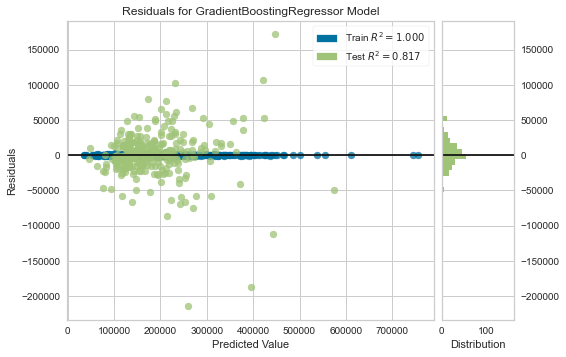

In [580]:
plot_model(tuned_best_models[0])

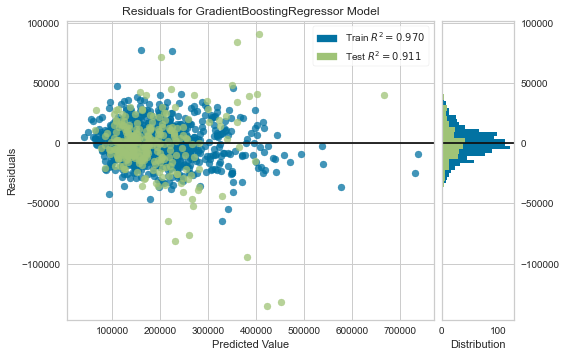

In [581]:
plot_model(best_models[0])

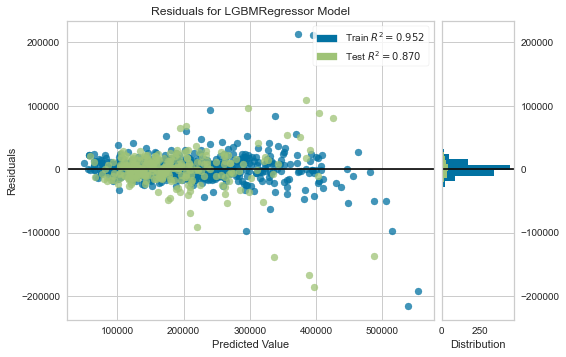

In [582]:
plot_model(tuned_best_models[1])

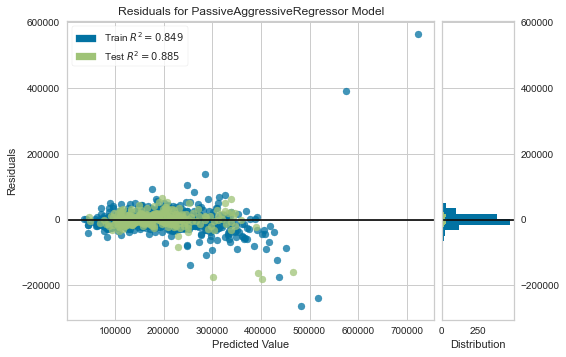

In [583]:
plot_model(tuned_best_models[2])

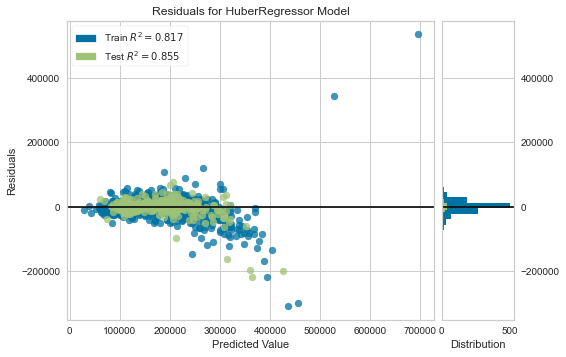

In [584]:
plot_model(tuned_best_models[3])

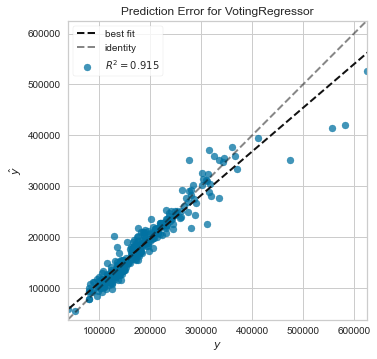

In [585]:
plot_model(blender, plot = 'error')

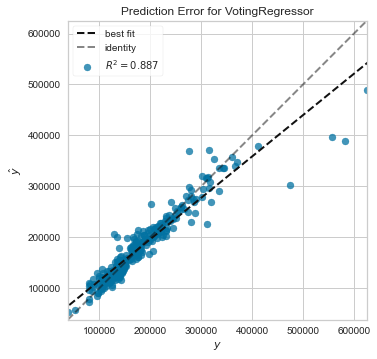

In [586]:
plot_model(tuned_blender, plot = 'error')

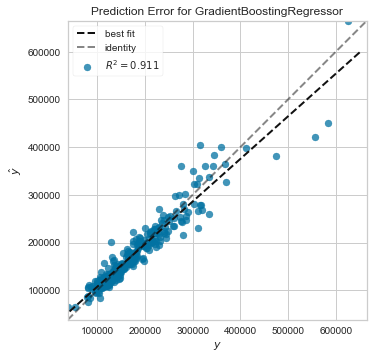

In [587]:
plot_model(best_models[0], plot = 'error')

#### Feature importances for best models

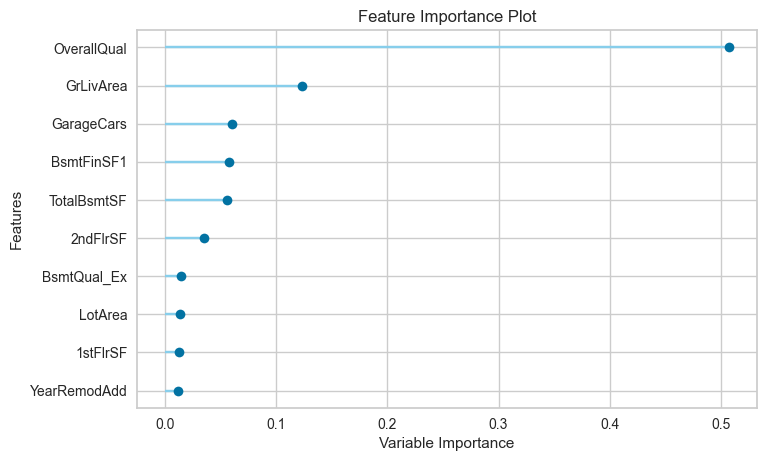

In [588]:
plot_model(best_models[0], plot='feature')


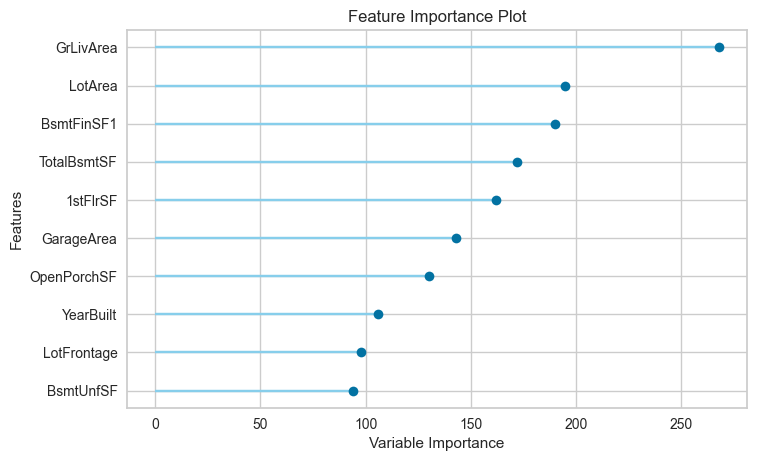

In [589]:
plot_model(best_models[1], plot='feature')

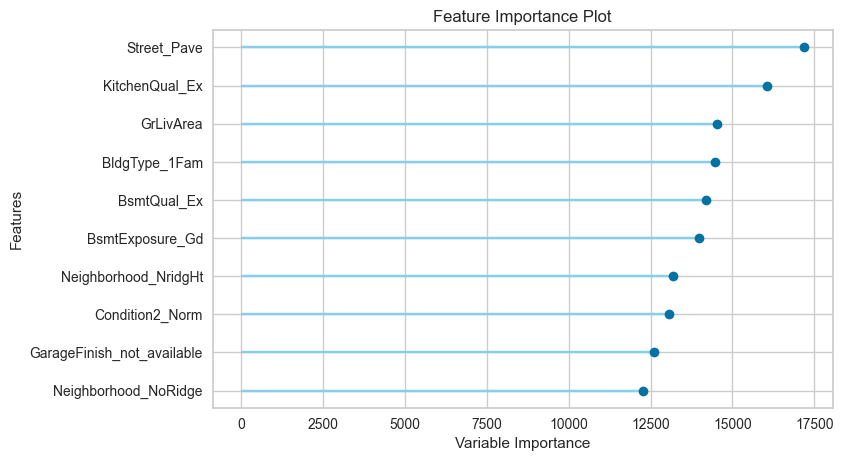

In [590]:
plot_model(best_models[2], plot='feature')

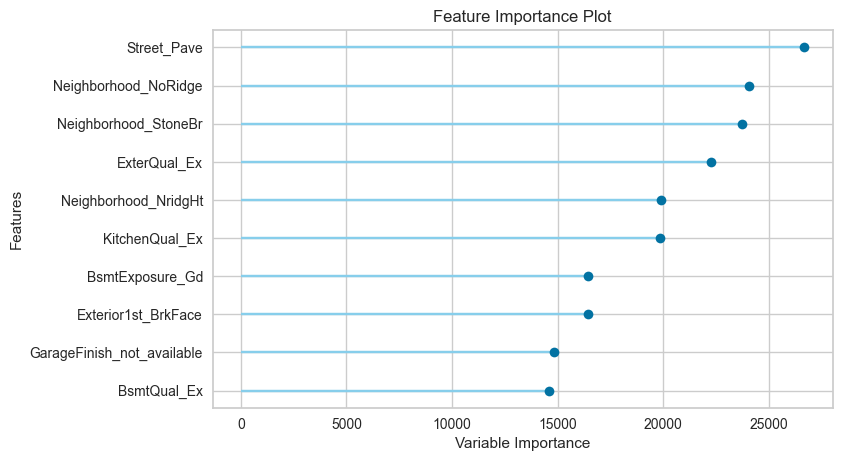

In [591]:
plot_model(best_models[3], plot='feature')

#### Feature importances for tuned best models:

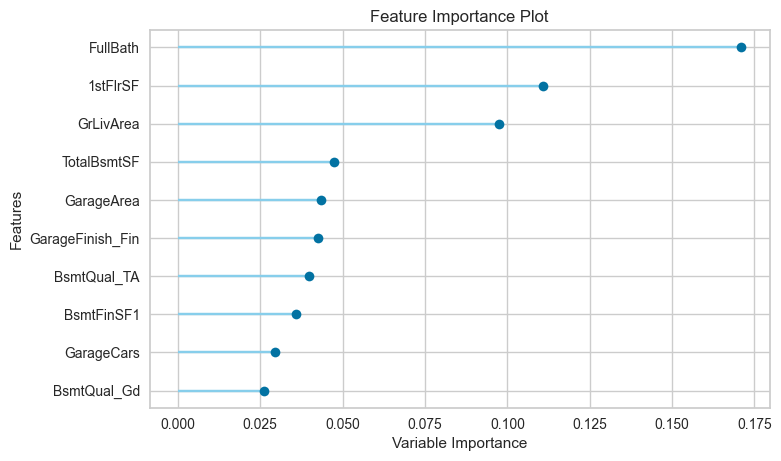

In [592]:
plot_model(tuned_best_models[0], plot='feature')

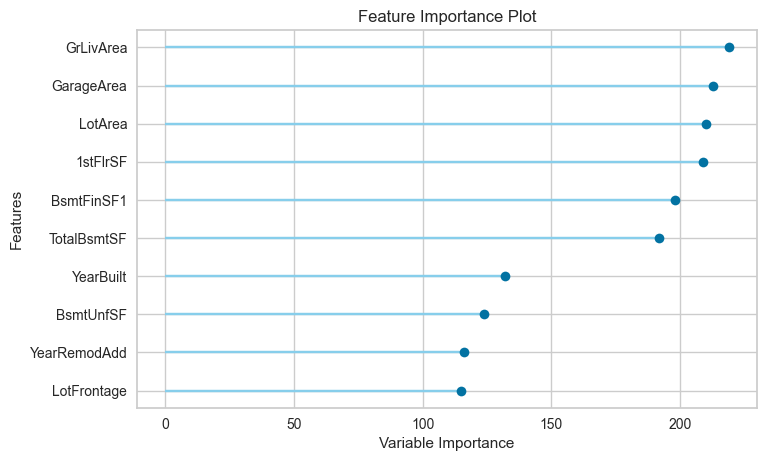

In [593]:
plot_model(tuned_best_models[1], plot='feature')

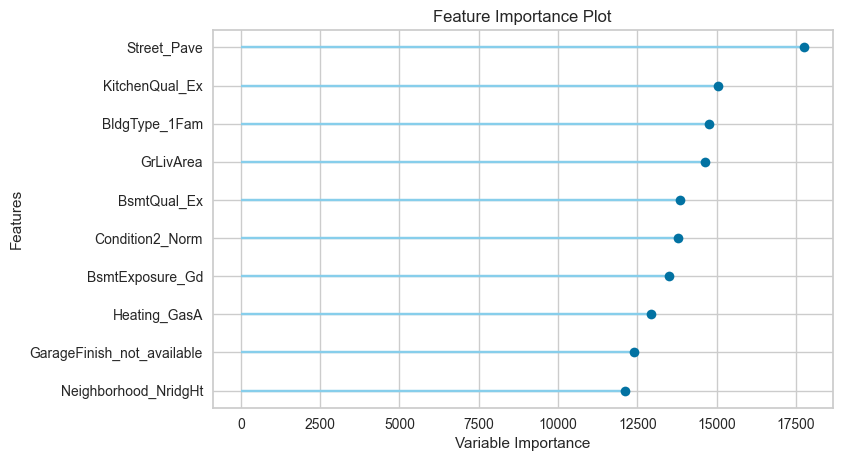

In [594]:
plot_model(tuned_best_models[2], plot='feature')

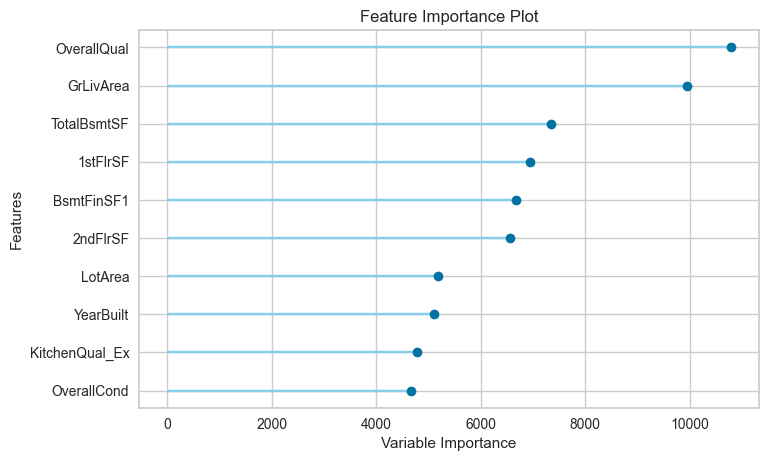

In [595]:
plot_model(tuned_best_models[3], plot='feature')

We can see that the different tuned models have different feature importances. 

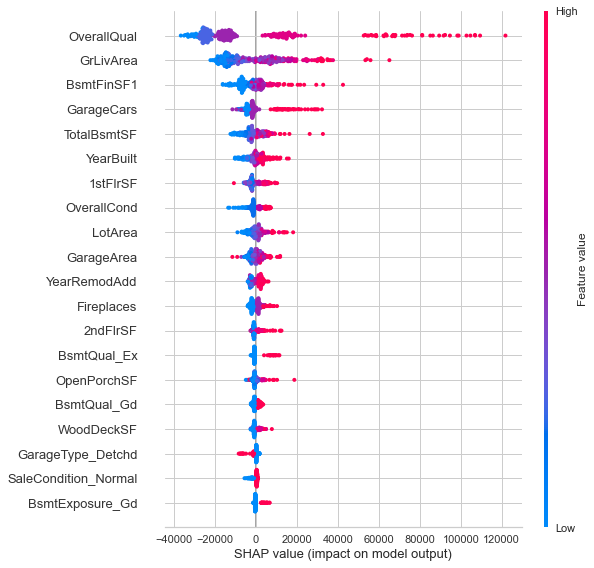

In [596]:
interpret_model(best_models[1])

#### Comparing RMSLE

In [597]:
prediction_holdout_blender = predict_model(blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,13313.3902,525430102.6805,22922.2622,0.9150,0.1018,0.0735


In [598]:
prediction_holdout_blender = predict_model(tuned_blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,14087.0690,695574121.2200,26373.7392,0.8874,0.1107,0.0775


In [599]:
prediction_holdout_best = predict_model(best_models[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15070.7260,550562715.2769,23464.0729,0.9109,0.1103,0.0824


In [600]:
prediction_holdout_best_tuned = predict_model(tuned_best_models[0])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,20870.7161,1130148169.0461,33617.6764,0.8171,0.1617,0.1185


## Solution

In [543]:
final_model = finalize_model(blender)

In [546]:
predictions = predict_model(final_model, data = test)

sample['SalePrice'] = predictions['Label']
sample.to_csv('submission_house_price.csv',index=False)
sample.head()

,Id,SalePrice
0,1461,118434.905750
1,1462,161850.586594
2,1463,184821.642425
3,1464,193918.591249
4,1465,192326.426677


## Launching, monitoring and maintaining the system

In [553]:
# Exporting the model
save_model(final_model, 'sale_price_pred')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['MSZoning',
                                                             'Street',
                                                             'LotShape',
                                                             'LandContour',
                                                             'LotConfig',
                                                             'LandSlope',
                                                             'Neighborhood',
                                                             'Condition1',
                                                             'Condition2',
                                                             'BldgType',
                                                             'HouseStyle',
                                                             'RoofStyle',
                                                           

### Deployment

The model deployment is performed using a streamlit app. The app is built in the House-prices-streamlitt-app.ipynb 